In [2]:
import pandas as pd
import numpy as np
%matplotlib
import matplotlib.pyplot as plt


Using matplotlib backend: Qt5Agg


In [3]:
dat1 = pd.read_csv('Trip183.csv')
dat2 = pd.read_csv('Zon183Unsum.csv')

/Users/ryanjcarlin/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (46) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
trip183 = dat1.drop(['Part', 'Ex', 'E/L', 'DayCode', 'Sur', 'PsgrMiles', 'BaseTP', 'Src', 'PlatHrs', 'RevHrs', 'Pattern', 'PatternID', 'TripExceptionCode', 'ThruTrip', 'NewNumber', 'AnnTrips', 'AnnPlatMi', 'AnnRevMi', 'AnnPlatHrs', 'AnnRevHrs', 'AnnRides', 'KeyType'], axis=1)

In [23]:
trip183.head()

,SignRt,InOut,KeyTrip,KeyBlock,StartMin,EndMin,Dir,BusType,Seats,TripMin,...,PsgrHours,StartTimeA,EndTimeA,Stop1,Name1,Stop2,Name2,LDFact,Period,CrwdThresh
0,14.0,I,40983895,101,307,326,N,43,35,38,...,0.0,5:07 AM,5:26 AM,4713,MOUNT RA,2108,S JACKSO,0.428571,AM,52
1,1.0,O,40983896,101,326,358,N,43,35,32,...,0.0,5:26 AM,5:58 AM,2108,S JACKSO,4311,10TH AVE,0.628571,AM,52
2,1.0,I,40983897,101,371,385,S,43,35,27,...,0.0,6:11 AM,6:25 AM,4311,10TH AVE,326,3RD AVE,0.428571,AM,52
3,14.0,O,40983898,101,385,433,S,43,35,48,...,0.0,6:25 AM,7:13 AM,326,3RD AVE,4713,MOUNT RA,0.771429,AM,52
4,14.0,I,40983904,101,446,468,N,43,35,35,...,0.0,7:26 AM,7:48 AM,4713,MOUNT RA,2108,S JACKSO,1.085714,AM,52


In [25]:
#is_am = trip183['Period']=='AM'
#am_routes_sum = trip183[is_am]
#am_routes_sum.head()

def period_sel(df, period):
    is_period = df['Period']==period
    period_routes = df[is_period]
    
    return period_routes

In [28]:
am_sum = period_sel(trip183, 'AM')
mid_sum = period_sel(trip183, 'MID')
pm_sum = period_sel(trip183, 'PM')
xev_sum = period_sel(trip183, 'XEV')
xnt_sum = period_sel(trip183, 'XNT')

In [31]:
dat2.head()
#dat3 = dat2.loc[dat2['Route'] == 78]
#dat4 = dat3.loc[dat3['Trip_ID'] == 39684221]
#dat4

,Route,Dir,Trip_ID,InOut,E/L,STOP_ID,Bearing,OnStreet,INT,CrossStreet,...,PassingTime,PassingMin,Period,AveOn,AveOff,AveLd,Obs,TRANS_LINK_ID,StandingLoad,StandingMin
0,1,S,40984018,I,L,400,S,3rd Ave,FS,Bell St,...,1/0/00,66775.29688,PM,0.8,1.0,8.4,75,41857,NaN,NaN
1,1,S,40984086,I,L,400,S,3rd Ave,FS,Bell St,...,1/0/00,79984.29688,XNT,0.3,0.7,3.9,73,41857,NaN,NaN
2,1,S,40983908,I,L,400,S,3rd Ave,FS,Bell St,...,1/0/00,32026.40039,AM,1.1,4.3,27.0,75,41857,NaN,NaN
3,1,S,40984086,I,L,420,S,3rd Ave,NS,Virginia St,...,1/0/00,80081.20313,XNT,0.2,0.5,3.6,73,149751,NaN,NaN
4,1,S,40983908,I,L,420,S,3rd Ave,NS,Virginia St,...,1/0/00,32143.80078,AM,0.4,6.3,21.1,75,149751,NaN,NaN


In [33]:
trip183_unsum = dat2.drop(['Jurisdiction', 'StandingLoad', 'StandingMin'], axis=1)
trip183_unsum.head()

,Route,Dir,Trip_ID,InOut,E/L,STOP_ID,Bearing,OnStreet,INT,CrossStreet,STOP_SEQ,PassingTime,PassingMin,Period,AveOn,AveOff,AveLd,Obs,TRANS_LINK_ID
0,1,S,40984018,I,L,400,S,3rd Ave,FS,Bell St,20.0,1/0/00,66775.29688,PM,0.8,1.0,8.4,75,41857
1,1,S,40984086,I,L,400,S,3rd Ave,FS,Bell St,20.0,1/0/00,79984.29688,XNT,0.3,0.7,3.9,73,41857
2,1,S,40983908,I,L,400,S,3rd Ave,FS,Bell St,20.0,1/0/00,32026.40039,AM,1.1,4.3,27.0,75,41857
3,1,S,40984086,I,L,420,S,3rd Ave,NS,Virginia St,21.0,1/0/00,80081.20313,XNT,0.2,0.5,3.6,73,149751
4,1,S,40983908,I,L,420,S,3rd Ave,NS,Virginia St,21.0,1/0/00,32143.80078,AM,0.4,6.3,21.1,75,149751


In [47]:
dat2.columns

Index(['Route', 'Dir', 'Trip_ID', 'InOut', 'E/L', 'STOP_ID', 'Bearing',
       'OnStreet', 'INT', 'CrossStreet', 'Jurisdiction', 'STOP_SEQ',
       'PassingTime', 'PassingMin', 'Period', 'AveOn', 'AveOff', 'AveLd',
       'Obs', 'TRANS_LINK_ID', 'StandingLoad', 'StandingMin'],
      dtype='object')

In [34]:
am_unsum = period_sel(trip183_unsum, 'AM')
mid_unsum = period_sel(trip183_unsum, 'MID')
pm_unsum = period_sel(trip183_unsum, 'PM')
xev_unsum = period_sel(trip183_unsum, 'XEV')
xnt_unsum = period_sel(trip183_unsum, 'XNT')

In [49]:
#am_unsum.sort_values('Trip_ID')
route893unsum = am_unsum.loc[am_unsum['Trip_ID'] == 34745814]
df = route893unsum.sort_values('STOP_SEQ')

,Route,Dir,Trip_ID,InOut,E/L,STOP_ID,Bearing,OnStreet,INT,CrossStreet,STOP_SEQ,PassingTime,PassingMin,Period,AveOn,AveOff,AveLd,Obs,TRANS_LINK_ID
453948,893,S,34745814,I,L,74232,W,Totem Lake Transit Center AcRd,NS,NE 128th St,1.0,1/0/00,25419.00000,AM,0.0,0.0,0.0,43,179176
453956,893,S,34745814,I,L,74731,W,NE 128th St,FS,120th Ave NE,2.0,1/0/00,25480.30078,AM,0.0,0.0,0.0,43,15706
453957,893,S,34745814,I,L,74734,W,NE 128th St,NS,I-405 Ramp,3.0,1/0/00,25541.59961,AM,0.0,0.0,0.0,43,173179
453961,893,S,34745814,I,L,85450,S,116th Ave NE,NS,NE 124th St,4.0,1/0/00,25641.90039,AM,0.0,0.0,0.0,43,54905
453938,893,S,34745814,I,L,70516,S,120th Ave NE,NS,NE 112th St,5.0,1/0/00,25884.80078,AM,0.0,0.0,0.0,43,63480
453942,893,S,34745814,I,L,70537,S,116th Ave NE,FS,NE 112th St,6.0,1/0/00,25934.09961,AM,0.0,0.0,0.0,43,90308
453941,893,S,34745814,I,L,70533,S,Forbes Creek Dr,FS,115th Ct NE,7.0,1/0/00,25959.50000,AM,0.0,0.0,0.1,43,151463
453939,893,S,34745814,I,L,70528,W,Forbes Creek Dr,FS,111th Ct NE,8.0,1/0/00,25990.90039,AM,0.1,0.0,0.1,43,27243
453940,893,S,34745814,I,L,70529,W,Forbes Creek Dr,NS,108th Ave NE,9.0,1/0/00,26021.50000,AM,0.0,0.0,0.1,43,24264
453936,893,S,34745814,I,L,70330,S,Market St,NS,20th Ave W,10.0,1/0/00,26209.19922,AM,2.8,0.5,2.5,43,88151


In [56]:
am_sorted = am_unsum.sort_values(by=["Route", "Trip_ID", "STOP_SEQ"])
am_sorted.head()

,Route,Dir,Trip_ID,InOut,E/L,STOP_ID,Bearing,OnStreet,INT,CrossStreet,STOP_SEQ,PassingTime,PassingMin,Period,AveOn,AveOff,AveLd,Obs,TRANS_LINK_ID
2869,1,N,40983896,O,L,3600,W,S Jackson St,FS,12th Ave S,1.0,1/0/00,19696.69922,AM,6.5,0.0,21.8,75,139199
1544,1,N,40983896,O,L,1500,W,S Jackson St,NS,8th Ave S,2.0,1/0/00,19742.30078,AM,0.2,0.0,22.1,74,235327
1624,1,N,40983896,O,L,1510,W,S Jackson St,FS,Maynard Ave S,3.0,1/0/00,19786.90039,AM,0.2,0.6,21.7,74,79016
1642,1,N,40983896,O,L,1530,W,S Jackson St,FS,5th Ave S,4.0,1/0/00,19840.50000,AM,1.0,7.4,15.1,75,92759
1748,1,N,40983896,O,L,1610,N,Prefontaine Pl S,NS,Yesler Way,5.0,1/0/00,19959.30078,AM,0.8,1.1,14.8,75,170765


In [58]:
def route_ridership(df, route):
    is_route = df['Route'] == route
    ridership = df[is_route]
    
    return ridership

In [60]:
route_ridership(am_sorted, 1)

,Route,Dir,Trip_ID,InOut,E/L,STOP_ID,Bearing,OnStreet,INT,CrossStreet,STOP_SEQ,PassingTime,PassingMin,Period,AveOn,AveOff,AveLd,Obs,TRANS_LINK_ID
2869,1,N,40983896,O,L,3600,W,S Jackson St,FS,12th Ave S,1.0,1/0/00,19696.69922,AM,6.5,0.0,21.8,75,139199
1544,1,N,40983896,O,L,1500,W,S Jackson St,NS,8th Ave S,2.0,1/0/00,19742.30078,AM,0.2,0.0,22.1,74,235327
1624,1,N,40983896,O,L,1510,W,S Jackson St,FS,Maynard Ave S,3.0,1/0/00,19786.90039,AM,0.2,0.6,21.7,74,79016
1642,1,N,40983896,O,L,1530,W,S Jackson St,FS,5th Ave S,4.0,1/0/00,19840.50000,AM,1.0,7.4,15.1,75,92759
1748,1,N,40983896,O,L,1610,N,Prefontaine Pl S,NS,Yesler Way,5.0,1/0/00,19959.30078,AM,0.8,1.1,14.8,75,170765
1320,1,N,40983896,O,L,538,N,3rd Ave,NS,Columbia St,6.0,1/0/00,20081.59961,AM,1.6,3.7,12.7,75,34778
1345,1,N,40983896,O,L,558,N,3rd Ave,NS,Seneca St,7.0,1/0/00,20193.80078,AM,1.4,2.4,11.7,74,35367
1383,1,N,40983896,O,L,575,N,3rd Ave,NS,Pike St,8.0,1/0/00,20281.19922,AM,1.7,3.3,10.1,74,132937
1422,1,N,40983896,O,L,600,N,3rd Ave,FS,Virginia St,9.0,1/0/00,20434.09961,AM,2.2,4.3,8.0,75,149751
1520,1,N,40983896,O,L,605,N,3rd Ave,FS,Bell St,10.0,1/0/00,20526.80078,AM,0.3,0.6,7.7,75,5173


In [57]:
#am_sum.sort_values('SignRt')
example75 = am_sum.loc[am_sum['SignRt'] == 75]


In [40]:
time_ax = np.linspace(0, 24, 25)

In [39]:
time_ax

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23.])

In [41]:
sample_dist = [0, 0, 0, 1, 3, 5, 7, 9, 10, 8, 6, 4, 4, 3, 3, 5, 7, 10, 9, 8, 6, 4, 2, 1, 0]

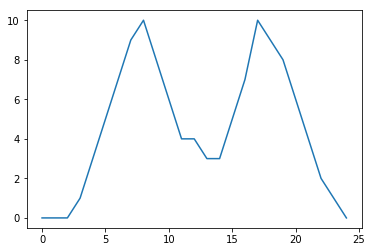

In [45]:
plt.plot(time_ax, sample_dist)